In [1]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.image import resize
import albumentations as A
import cv2

In [2]:
dataset_path = "data/image/raw"
categories = os.listdir(dataset_path)
print("Categories:", categories)

Categories: ['Croissant_sweet_mixed_berries.jpg', 'Akar_tonjong_segar.jpg', 'Bayam_tumis_+_oncom.jpg', 'Sagu_aren_kering.jpg', 'Greenfields_Yogurt_Drink_Peach.jpg', 'Daun_Pete_Cina.jpg', 'Ikan_cakalang_perut_segar.jpg', 'Lamtoro_(pete_cina)_biji_muda.jpg', 'Kacang_Merah_segar_rebus.jpg', 'Kacang_Merah.jpg', 'Good_Day_Mocacinno.jpg', 'Kakap.jpg', 'Ikan_Bawal.jpg', 'Lawar_babi_masakan.jpg', 'NÜ_Green_Tea_Rasa_Madu.jpg', 'Bayam_kukus.jpg', 'Jagung_kuning_pipil_kering_mentah.jpg', 'Semangka.jpg', 'Toge_Goreng_.jpg', 'Daun_tespong_segar.jpg', 'Ultra_Milk_Low_Fat.jpg', 'Tempe_kedelai_murni_mentah.jpg', 'Nasu_likku_masakan.jpg', 'Tahu_telur.jpg', 'Daun_bawang__merah_segar.jpg', 'Konyaku_Grain.jpg', 'Gete_kuah_asam_masakan.jpg', 'Mie_ayam.jpg', 'Oncom_kacang_hijau_+_singkong.jpg', 'Kacang_Panjang.jpg', 'Ikan_kapar_segar.jpg', 'Ikan_telur_asin_mentah.jpg', 'Roti_warna_sawo_matang.jpg', 'Sagu_kasbi_segar.jpg', 'golda_coffee_latte.jpg', 'ABC_Sweet_Soy_Sauce_Kecap_Manis.jpg', 'Pop_mie_pedas_dower.

In [9]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.2,
    horizontal_flip = True,
    brightness_range = [0.8, 1.2]
)

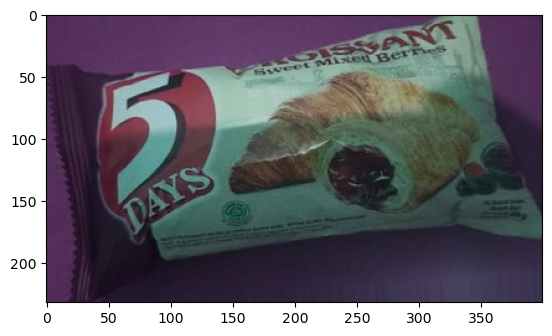

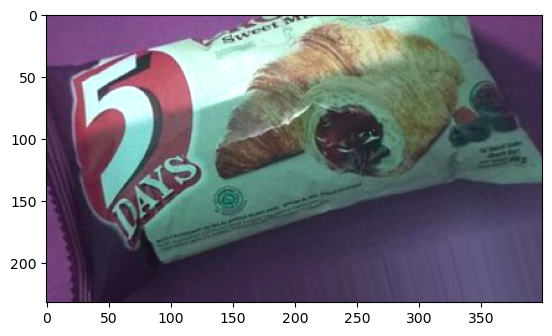

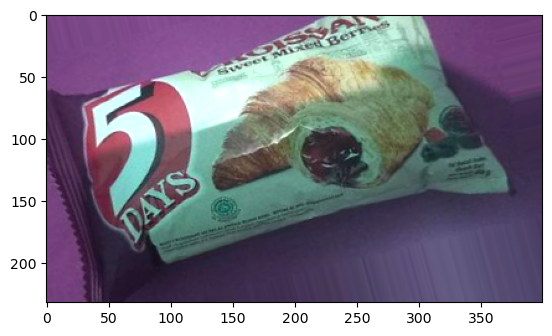

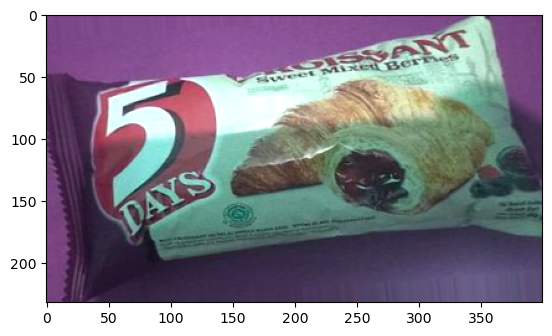

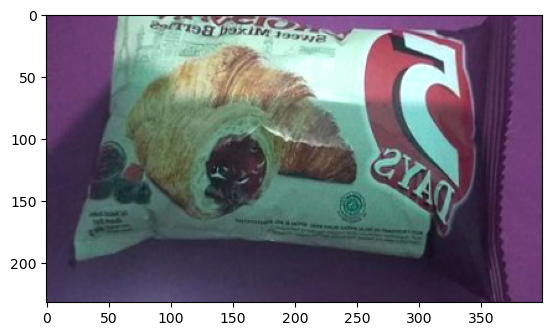

In [10]:
dataset_path = "data/image/raw"
img_path = os.path.join(dataset_path, 'Croissant_sweet_mixed_berries.jpg')

img = load_img(img_path)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.imshow(batch[0] / 255.0)
    plt.show()
    i += 1
    if i > 4:
        break


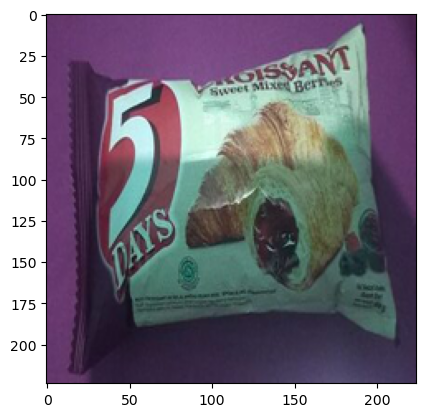

In [11]:
def preprocess_image(img, target_size=(224, 224)):
    # Resize image
    img = img.resize(target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi ke rentang 0-1
    return img_array

# Coba preprocess pada gambar contoh
preprocessed_img = preprocess_image(img)
plt.imshow(preprocessed_img)
plt.show()

In [12]:
# Load MobileNetV2 sebagai feature extractor
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze semua layer agar tidak dilatih ulang
for layer in base_model.layers:
    layer.trainable = False

# Model untuk ekstraksi fitur
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Ekstrak fitur dari gambar yang telah dipreprocess
features = feature_extractor.predict(np.expand_dims(preprocessed_img, axis=0))
print("Features shape:", features.shape)

9406464/9406464 [==============================] - 1s 0us/step
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x304e4f7f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x304e4f7f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call usin

2024-11-13 11:04:25.996496: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 341ms/step
Features shape: (1, 7, 7, 1280)


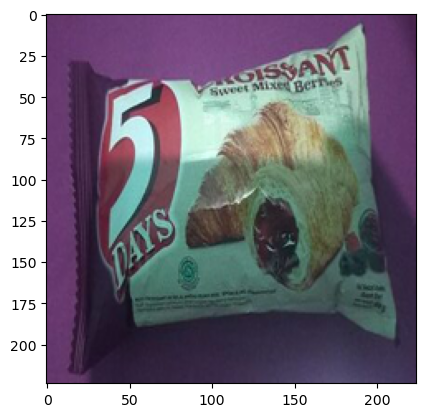

In [16]:
def load_and_display_image(img_path):
    img = load_img(img_path)
    img = img.resize((224, 224))
    img_array = img_to_array(img) / 255.0  # Normalisasi ke 0-1
    plt.imshow(img_array)
    plt.show()

# Tes fungsi ini
load_and_display_image(img_path)

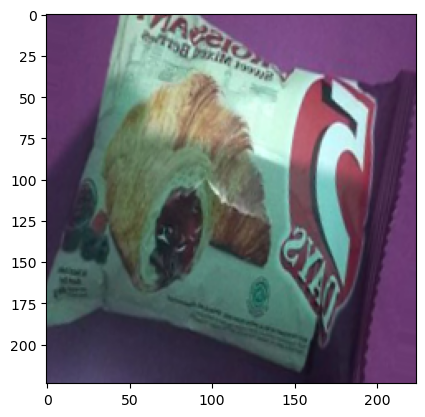

In [17]:
def preprocess_and_augment(img_path):
    # Load gambar tanpa normalisasi terlebih dahulu
    img = load_img(img_path)
    img = img.resize((224, 224))
    img = img_to_array(img)
    
    # Reshape untuk augmentasi
    img = img.reshape((1,) + img.shape)
    
    # Terapkan augmentasi
    aug_img = next(datagen.flow(img, batch_size=1))[0] / 255.0  # Normalisasi setelah augmentasi
    
    return aug_img

# Tes fungsi ini
augmented_image = preprocess_and_augment(img_path)
plt.imshow(augmented_image)
plt.show()